In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lauztat.parameters import POI
from lauztat.hypotests import ConfidenceInterval
from lauztat.calculators import AsymptoticCalculator
from lauztat.config import Config

In [2]:
import zfit
from zfit import ztf
from zfit.core.loss import ExtendedUnbinnedNLL, UnbinnedNLL
from zfit.minimizers.minimizer_minuit import MinuitMinimizer

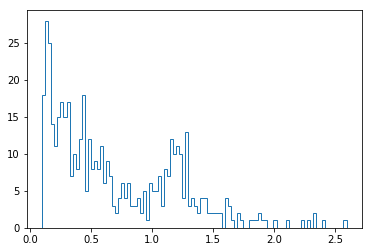

In [3]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 500)
peak = np.random.normal(1.2, 0.1, 80)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

plt.hist(data, bins=100, histtype='step');

In [4]:
obs = zfit.Space('x', limits=bounds)

In [5]:
mean = zfit.Parameter("mean", 1.2, 0.5, 2.0)
sigma = zfit.Parameter("sigma", 0.1, 0.02, 0.2)
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 20., 0., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [6]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)
background =  Nbkg * zfit.pdf.Exponential(obs=obs, lambda_=lambda_)
tot_model = signal + background

In [7]:
# Create the negative log likelihood
from zfit.core.loss import ExtendedUnbinnedNLL, UnbinnedNLL
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=[tot_model], data=[data_], fit_range=[obs]) 

In [8]:
# Load and instantiate a tensorflow minimizer
from zfit.minimizers.minimizer_minuit import MinuitMinimizer
minimizer = MinuitMinimizer()

In [9]:
# Create the minimization graph to minimize mu and sigma and run it (minimize does it directly)
minimum = minimizer.minimize(loss=nll)

FCN = -2349.8670050275314 
 TOTAL NCALL = 143 
 NCALLS = 143 
 
 
 EDM = 9.940933384935724e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nsig,73.9471,13.172,,,0,490,No
1,lambda,-1.94354,0.119214,,,-4,-1,No
2,mean,1.20665,0.0178914,,,0.5,2,No
3,sigma,0.0995561,0.0208026,,,0.02,0.2,No
4,Nbkg,416.003,22.6775,,,0,539,No


In [10]:
def plotfitresult(pdf, bounds, nbins, data):
    x = np.linspace(*bounds, num=1000)
    pdf = zfit.run(tot_model.pdf(x, norm_range=bounds))
    _ = plt.plot(x, ((bounds[1] - bounds[0])/nbins)*(pdf), "-r")  

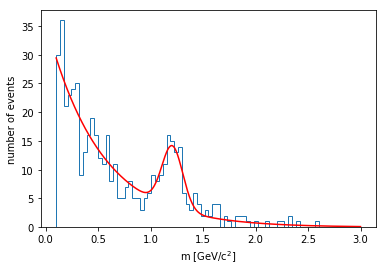

In [11]:
nbins = 80
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, data)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")
plt.savefig("fit_ci_ex.png")

## Confidence interval on mean.

In [12]:
def lossbuilder(model, data, weights=None):
    loss = ExtendedUnbinnedNLL(model=model, data=data, fit_range=[obs]) 
    return loss
    
config = Config(tot_model, data_, lossbuilder, MinuitMinimizer())

In [13]:
config.bestfit

Get fit best values!


FCN = -2349.867009646078 
 TOTAL NCALL = 62 
 NCALLS = 62 
 
 
 EDM = 5.3167521815787875e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nsig,73.9471,13.1632,,,0,490,No
1,lambda,-1.94355,0.119189,,,-4,-1,No
2,mean,1.20658,0.0178857,,,0.5,2,No
3,sigma,0.0995384,0.0207896,,,0.02,0.2,No
4,Nbkg,416.003,22.6666,,,0,539,No


In [14]:
calc = AsymptoticCalculator(config)

In [15]:
poinull = POI(mean, value=np.linspace(1.15, 1.26, 100))
ci = ConfidenceInterval(poinull, calc, qtilde=False)

In [16]:
ci.interval();

Compute qobs for the null hypothesis!

Confidence interval on mean:
	1.1890518740688276 < mean < 1.2249924632499156 at 68.0% C.L.


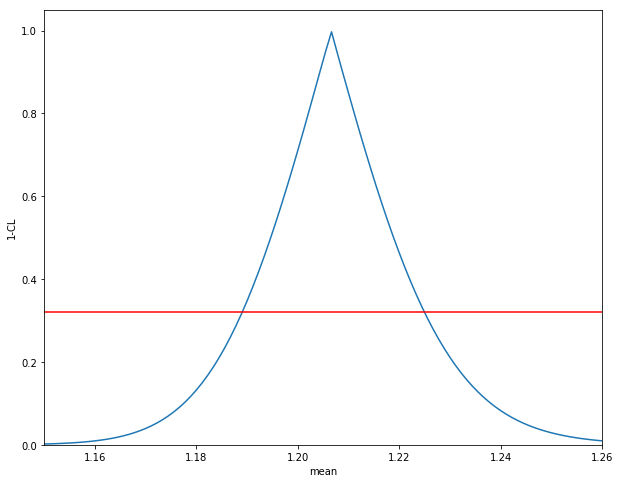

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
ci.plot(ax=ax)
f.savefig("ci_1_cl_plot.png")